# List of top Crypto exchanges from Coin gecko

In [53]:
import pandas as pd
import pymongo
from pymongo import MongoClient
from mongo2_config import mongo_uri
import numpy as np
import certifi
from mongo2_config import mongo_uri
import datetime
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [54]:
df = pd.read_json("C:/UC_Berkeley/Analysis_Projects_Class_Folder/Module20_Final_Project/Data_Kaggle_Historical/Exchanges.json")
df.head()

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,0.0,10.0,1.0,319036.863746,319036.863746
1,okex,OKX,2013.0,Belize,,https://www.okx.com,https://assets.coingecko.com/markets/images/96...,0.0,10.0,2.0,107996.439024,107996.439024
2,gdax,Coinbase Exchange,2012.0,United States,,https://www.coinbase.com,https://assets.coingecko.com/markets/images/23...,0.0,10.0,3.0,87531.692695,87531.692695
3,crypto_com,Crypto.com Exchange,2019.0,Cayman Islands,Crypto.com Exchange is the best place to trade...,https://crypto.com/exchange,https://assets.coingecko.com/markets/images/58...,0.0,10.0,4.0,72901.193934,72901.193934
4,kucoin,KuCoin,2014.0,Seychelles,,https://www.kucoin.com/,https://assets.coingecko.com/markets/images/61...,0.0,10.0,5.0,53433.314002,53433.314002


In [55]:
df.shape[0]

250

In [56]:
df = df.drop(columns=['description','url','image'], axis=1)
df

,id,name,year_established,country,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,0.0,10.0,1.0,319036.863746,319036.863746
1,okex,OKX,2013.0,Belize,0.0,10.0,2.0,107996.439024,107996.439024
2,gdax,Coinbase Exchange,2012.0,United States,0.0,10.0,3.0,87531.692695,87531.692695
3,crypto_com,Crypto.com Exchange,2019.0,Cayman Islands,0.0,10.0,4.0,72901.193934,72901.193934
4,kucoin,KuCoin,2014.0,Seychelles,0.0,10.0,5.0,53433.314002,53433.314002
...,...,...,...,...,...,...,...,...,...
245,graviex,Graviex,2017.0,Malta,0.0,4.0,246.0,4.570441,4.570441
246,auroraswap,AuroraSwap,2021.0,None,0.0,4.0,247.0,3.973797,3.973797
247,lydia_finance,Lydia Finance,2021.0,None,0.0,4.0,248.0,3.288042,3.288042
248,aprobit,Aprobit,2020.0,South Korea,0.0,4.0,249.0,2.737971,2.737971


In [57]:
# Replace NaN as '0'
df.isnull().sum().sum()
df.isna().sum()

id                                   0
name                                 0
year_established                    67
country                            100
has_trading_incentive               10
trust_score                          1
trust_score_rank                     1
trade_volume_24h_btc                 0
trade_volume_24h_btc_normalized      0
dtype: int64

In [58]:
df[df.isnull().any(axis='columns')]

,id,name,year_established,country,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
7,gate,Gate.io,NaN,Hong Kong,0.0,10.0,8.0,28827.467634,28827.467634
11,coinsbit,Coinsbit,NaN,Estonia,0.0,10.0,12.0,9581.522694,9581.522694
12,bybit_spot,Bybit (spot),2018.0,None,0.0,10.0,13.0,7066.633363,7066.633363
16,mxc,MEXC Global,2018.0,None,0.0,9.0,17.0,19235.375981,19235.375981
48,max_maicoin,Max Maicoin,NaN,Taiwan,0.0,8.0,49.0,301.249796,301.249796
...,...,...,...,...,...,...,...,...,...
240,trade_ogre,TradeOgre,2018.0,None,NaN,4.0,241.0,21.112124,21.112124
241,dmm,KyberSwap (Ethereum),2018.0,None,0.0,4.0,242.0,19.311224,19.311224
244,impossible_finance,Impossible Finance,2021.0,None,0.0,4.0,245.0,5.328958,5.328958
246,auroraswap,AuroraSwap,2021.0,None,0.0,4.0,247.0,3.973797,3.973797


In [59]:
id_country = {
    'bybit_spot':'British Virgin Islands', 
    'mxc':'Seychelles',
    'aax':'Seychelles',
    'maiar':'Elrond','cybex':'United States',
    'uniswap':'United States', 
    'pancakeswap_new':'DEX', 
    'spookyswap':'DEX', 
    'uniswap_v2':'United States', 
    'traderjoe':'DEX',
    'sushiswap':'DEX', 
    'biswap':'DEX', 
    'bitexen':'Turkey', 
    'osmosis':'DEX', 
    'katana':'DEX'
}

In [60]:
df

,id,name,year_established,country,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,0.0,10.0,1.0,319036.863746,319036.863746
1,okex,OKX,2013.0,Belize,0.0,10.0,2.0,107996.439024,107996.439024
2,gdax,Coinbase Exchange,2012.0,United States,0.0,10.0,3.0,87531.692695,87531.692695
3,crypto_com,Crypto.com Exchange,2019.0,Cayman Islands,0.0,10.0,4.0,72901.193934,72901.193934
4,kucoin,KuCoin,2014.0,Seychelles,0.0,10.0,5.0,53433.314002,53433.314002
...,...,...,...,...,...,...,...,...,...
245,graviex,Graviex,2017.0,Malta,0.0,4.0,246.0,4.570441,4.570441
246,auroraswap,AuroraSwap,2021.0,None,0.0,4.0,247.0,3.973797,3.973797
247,lydia_finance,Lydia Finance,2021.0,None,0.0,4.0,248.0,3.288042,3.288042
248,aprobit,Aprobit,2020.0,South Korea,0.0,4.0,249.0,2.737971,2.737971


In [61]:
# df['country'] = df['country'].fillna(id_country)
# df['country']=df['country'].apply(lambda x: x if x == x else id_country)
# print(df)
# df['Country']= df['id'].map(id_country)
df.country = df.country.fillna(df.id.map(id_country))
df

,id,name,year_established,country,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,0.0,10.0,1.0,319036.863746,319036.863746
1,okex,OKX,2013.0,Belize,0.0,10.0,2.0,107996.439024,107996.439024
2,gdax,Coinbase Exchange,2012.0,United States,0.0,10.0,3.0,87531.692695,87531.692695
3,crypto_com,Crypto.com Exchange,2019.0,Cayman Islands,0.0,10.0,4.0,72901.193934,72901.193934
4,kucoin,KuCoin,2014.0,Seychelles,0.0,10.0,5.0,53433.314002,53433.314002
...,...,...,...,...,...,...,...,...,...
245,graviex,Graviex,2017.0,Malta,0.0,4.0,246.0,4.570441,4.570441
246,auroraswap,AuroraSwap,2021.0,NaN,0.0,4.0,247.0,3.973797,3.973797
247,lydia_finance,Lydia Finance,2021.0,NaN,0.0,4.0,248.0,3.288042,3.288042
248,aprobit,Aprobit,2020.0,South Korea,0.0,4.0,249.0,2.737971,2.737971


In [62]:
print(df.dtypes)

id                                  object
name                                object
year_established                   float64
country                             object
has_trading_incentive              float64
trust_score                        float64
trust_score_rank                   float64
trade_volume_24h_btc               float64
trade_volume_24h_btc_normalized    float64
dtype: object


In [63]:
id_country_mising_df = df[df['country'].isnull()]
id_country_mising_df

,id,name,year_established,country,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
85,hitbtc,HitBTC,2013.0,NaN,0.0,6.0,86.0,97181.121273,87898.309229
104,stormgain,Stormgain,NaN,NaN,0.0,6.0,105.0,891.678856,891.678856
106,defi_kingdoms,Defi Kingdoms,NaN,NaN,0.0,6.0,107.0,785.831481,785.831481
108,vvs_finance,VVS Finance,2021.0,NaN,0.0,6.0,109.0,731.213075,731.213075
111,bancor,Bancor Network,NaN,NaN,0.0,6.0,112.0,565.512890,565.512890
...,...,...,...,...,...,...,...,...,...
240,trade_ogre,TradeOgre,2018.0,NaN,NaN,4.0,241.0,21.112124,21.112124
241,dmm,KyberSwap (Ethereum),2018.0,NaN,0.0,4.0,242.0,19.311224,19.311224
244,impossible_finance,Impossible Finance,2021.0,NaN,0.0,4.0,245.0,5.328958,5.328958
246,auroraswap,AuroraSwap,2021.0,NaN,0.0,4.0,247.0,3.973797,3.973797


In [64]:
# select a column as series and then convert it into a column
list_of_ids = id_country_mising_df['id'].to_list()
list_of_ids

['hitbtc',
 'stormgain',
 'defi_kingdoms',
 'vvs_finance',
 'bancor',
 'wootrade',
 'defi_swap',
 'tokenomy',
 'delta_spot',
 'paymium',
 'sushiswap_arbitrum',
 'uniswap_polygon',
 'quickswap',
 'bw',
 'netswap',
 'beethovenx',
 'mm_finance',
 'dmm_polygon',
 'trisolaris',
 'thorswap',
 'shibaswap',
 'sushiswap_harmony',
 'balancer_polygon',
 'mojitoswap',
 'viperswap',
 'wannaswap',
 'ubeswap',
 'paintswap',
 'kumex',
 'sushiswap_fantom',
 'dmm_avalanche',
 'fuse_fi',
 'oolongswap',
 'dfx_polygon',
 'injective',
 'one_inch_liquidity_protocol',
 'dmm_bsc',
 'cherryswap',
 'crodex',
 'mars_ecosystem',
 'sushiswap_xdai',
 'soulswap',
 'sushiswap_celo',
 'swapr',
 'huckleberry',
 'probit_kr',
 'nearpad',
 'mistswap_smart_bitcoin_cash',
 'sushiswap_bsc',
 'benswap_smart_bitcoin_cash',
 'kuswap',
 'polycat_finance',
 'btc_trade_ua',
 'tropical_finance',
 'jetswap',
 'openswap',
 'swapr_arbitrum',
 'coingi',
 'namebase',
 'levinswap_xdai',
 'bossswap',
 'photonswap',
 'morpheus_swap',
 'temp

In [65]:
df.country = df.country.fillna('DEX')
df

,id,name,year_established,country,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,0.0,10.0,1.0,319036.863746,319036.863746
1,okex,OKX,2013.0,Belize,0.0,10.0,2.0,107996.439024,107996.439024
2,gdax,Coinbase Exchange,2012.0,United States,0.0,10.0,3.0,87531.692695,87531.692695
3,crypto_com,Crypto.com Exchange,2019.0,Cayman Islands,0.0,10.0,4.0,72901.193934,72901.193934
4,kucoin,KuCoin,2014.0,Seychelles,0.0,10.0,5.0,53433.314002,53433.314002
...,...,...,...,...,...,...,...,...,...
245,graviex,Graviex,2017.0,Malta,0.0,4.0,246.0,4.570441,4.570441
246,auroraswap,AuroraSwap,2021.0,DEX,0.0,4.0,247.0,3.973797,3.973797
247,lydia_finance,Lydia Finance,2021.0,DEX,0.0,4.0,248.0,3.288042,3.288042
248,aprobit,Aprobit,2020.0,South Korea,0.0,4.0,249.0,2.737971,2.737971


In [66]:
id_country_mising_df = df[df['country'].isnull()]
id_country_mising_df

,id,name,year_established,country,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized


In [67]:
df.loc[df['country'] == 'United States']

,id,name,year_established,country,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
2,gdax,Coinbase Exchange,2012.0,United States,0.0,10.0,3.0,87531.692695,87531.692695
8,kraken,Kraken,2011.0,United States,0.0,10.0,9.0,21661.310821,21661.310821
10,binance_us,Binance US,2019.0,United States,0.0,10.0,11.0,9705.320164,9705.320164
13,gemini,Gemini,2014.0,United States,0.0,10.0,14.0,3671.177185,3671.177185
15,bittrex,Bittrex,2014.0,United States,0.0,10.0,16.0,1983.527160,1983.527160
20,ftx_us,FTX.US,2020.0,United States,0.0,9.0,21.0,7037.011864,7037.011864
47,okcoin,Okcoin,2013.0,United States,0.0,8.0,48.0,505.520574,505.520574
84,cybex,Cybex DEX,2017.0,United States,0.0,7.0,85.0,0.232262,0.232262
86,uniswap,Uniswap (v3),2018.0,United States,0.0,6.0,87.0,32324.761902,32324.761902
90,uniswap_v2,Uniswap (v2),2018.0,United States,0.0,6.0,91.0,5746.844057,5746.844057


In [68]:
# exporting the dataframe to csv
df.to_csv('Worldwide_Crypto_Exchange.csv')

In [69]:
# groupby
country_grouped_df = df.groupby(by="country", dropna=False).sum()
country_grouped_df = country_grouped_df.reset_index()
country_grouped_df = country_grouped_df.sort_values(by = ["trade_volume_24h_btc_normalized"], ascending = False)
country_grouped_df

,country,year_established,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
10,Cayman Islands,12107.0,0.0,52.0,166.0,421685.421631,421685.421631
30,Seychelles,38329.0,0.0,131.0,1600.0,374072.410179,260767.496436
41,United States,26209.0,0.0,101.0,910.0,170847.622566,170449.827970
12,DEX,76759.0,0.0,458.0,16260.0,162885.173207,138396.866924
6,Belize,6046.0,0.0,23.0,193.0,113566.014030,113566.014030
34,South Korea,18149.0,1.0,54.0,1124.0,78344.174033,78344.174033
31,Singapore,24217.0,0.0,83.0,946.0,60588.793772,60588.793772
8,British Virgin Islands,16141.0,0.0,55.0,801.0,129580.613645,57117.283016
11,China,10087.0,0.0,35.0,343.0,226732.756636,56305.146628
14,Estonia,28250.0,0.0,109.0,1371.0,56043.493045,54983.911051


In [70]:
refined_country_grouped = country_grouped_df.head(12)
refined_country_grouped

,country,year_established,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
10,Cayman Islands,12107.0,0.0,52.0,166.0,421685.421631,421685.421631
30,Seychelles,38329.0,0.0,131.0,1600.0,374072.410179,260767.496436
41,United States,26209.0,0.0,101.0,910.0,170847.622566,170449.827970
12,DEX,76759.0,0.0,458.0,16260.0,162885.173207,138396.866924
6,Belize,6046.0,0.0,23.0,193.0,113566.014030,113566.014030
34,South Korea,18149.0,1.0,54.0,1124.0,78344.174033,78344.174033
31,Singapore,24217.0,0.0,83.0,946.0,60588.793772,60588.793772
8,British Virgin Islands,16141.0,0.0,55.0,801.0,129580.613645,57117.283016
11,China,10087.0,0.0,35.0,343.0,226732.756636,56305.146628
14,Estonia,28250.0,0.0,109.0,1371.0,56043.493045,54983.911051


In [71]:
# groupby year count
Year_established_df = df.groupby(['year_established'])['year_established'].count().reset_index(name='Number of Exchanges')
Year_established_df

,year_established,Number of Exchanges
0,2011.0,2
1,2012.0,2
2,2013.0,14
3,2014.0,15
4,2015.0,3
5,2016.0,5
6,2017.0,25
7,2018.0,48
8,2019.0,23
9,2020.0,16


In [72]:
Year_established_df['year_established']=Year_established_df['year_established'].astype(int)
# Year_established_df['year_established'] = df['year_established'].fillna(0).astype(int)
# print(Year_established_df.dtypes)
Year_established_df

,year_established,Number of Exchanges
0,2011,2
1,2012,2
2,2013,14
3,2014,15
4,2015,3
5,2016,5
6,2017,25
7,2018,48
8,2019,23
9,2020,16


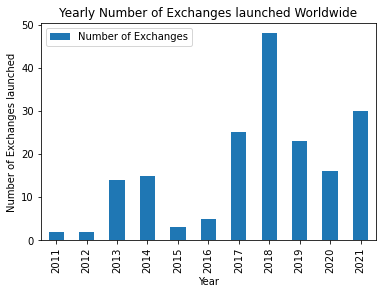

In [73]:
# plotting graph
Year_established_df.plot(x="year_established", y=["Number of Exchanges"], kind="bar")
plt.xlabel('Year')
plt.ylabel('Number of Exchanges launched')
plt.title("Yearly Number of Exchanges launched Worldwide")
# plt.title("Coin wise Age")
#Save Figure
plt.savefig("Analysis/Yearly_Number_Exchanges_launched_worldwide.png")

plt.show()

In [74]:
slice_refined_country_grouped = refined_country_grouped[:12].copy
slice_refined_country_grouped

new_row = pd.DataFrame(data = {
    'country' : ['others(TD_less than 10,000)'],
    'trade_volume_24h_btc_normalized' : [country_grouped_df['trade_volume_24h_btc_normalized'][12:].sum()]
})

#combining top 5 with others
slice_refined_country_grouped = pd.concat([refined_country_grouped, new_row])
slice_refined_country_grouped

,country,year_established,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
10,Cayman Islands,12107.0,0.0,52.0,166.0,421685.421631,421685.421631
30,Seychelles,38329.0,0.0,131.0,1600.0,374072.410179,260767.496436
41,United States,26209.0,0.0,101.0,910.0,170847.622566,170449.827970
12,DEX,76759.0,0.0,458.0,16260.0,162885.173207,138396.866924
6,Belize,6046.0,0.0,23.0,193.0,113566.014030,113566.014030
34,South Korea,18149.0,1.0,54.0,1124.0,78344.174033,78344.174033
31,Singapore,24217.0,0.0,83.0,946.0,60588.793772,60588.793772
8,British Virgin Islands,16141.0,0.0,55.0,801.0,129580.613645,57117.283016
11,China,10087.0,0.0,35.0,343.0,226732.756636,56305.146628
14,Estonia,28250.0,0.0,109.0,1371.0,56043.493045,54983.911051


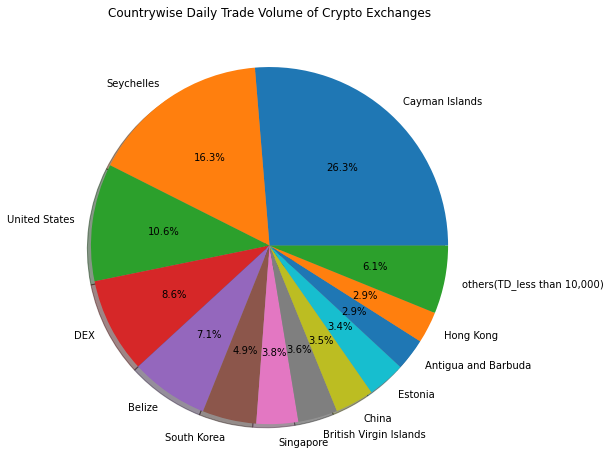

In [75]:
# Set the x-axis to a list of strings for each month.
x_axis = slice_refined_country_grouped["country"]

# Set the y-axis to a list of floats as the total fare in US dollars accumulated for each month.
y_axis = slice_refined_country_grouped["trade_volume_24h_btc_normalized"]

plt.subplots(figsize=(8, 15))
plt.pie(y_axis, labels=x_axis, autopct='%.1f%%', shadow = True)
plt.title("Countrywise Daily Trade Volume of Crypto Exchanges")

#Save Figure
plt.savefig("Analysis/Countrywise_Daily_Trade Volume_Crypto_Exchanges.png")

plt.show()